In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [10]:
dtrain = pd.read_csv("Google_Stock_Train.csv")
dtest = pd.read_csv("Google_Stock_Test.csv")

In [11]:
dtrain

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


In [12]:
dtest

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100


In [5]:
import matplotlib.pyplot as plt

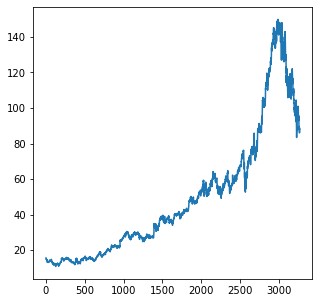

In [13]:
plt.figure(figsize = (5,5))
plt.plot(dtrain["Adj Close"])

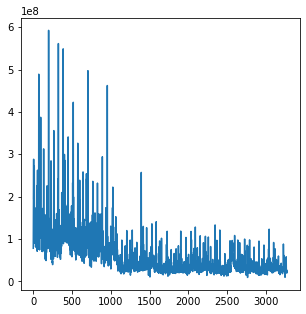

In [14]:
plt.figure(figsize = (5,5))
plt.plot(dtrain["Volume"])

In [17]:
training_set = dtrain.iloc[:,1:2]

In [22]:
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [23]:
xtrain = training_set[0:1257]
ytrain = training_set[1:1258]
xtrain = np.reshape(xtrain,(1257,1,1))

In [44]:
model = Sequential()
model.add(LSTM(units = 4,input_shape = (None,1),activation = "sigmoid"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam",loss = "mean_squared_error")
model.fit(xtrain,ytrain,epochs = 300)

Epoch 1/300
40/40 [==============================] - 1s 2ms/step - loss: 0.1595
Epoch 2/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0914
Epoch 3/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0490
Epoch 4/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 5/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 6/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 8/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 9/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 10/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 11/300
40/40 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 12/300
40/40 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 13/300
40/40 [=================

Epoch 100/300
40/40 [==============================] - 0s 2ms/step - loss: 2.0033e-04
Epoch 101/300
40/40 [==============================] - 0s 2ms/step - loss: 1.8951e-04
Epoch 102/300
40/40 [==============================] - 0s 2ms/step - loss: 1.7953e-04
Epoch 103/300
40/40 [==============================] - 0s 2ms/step - loss: 1.7009e-04
Epoch 104/300
40/40 [==============================] - 0s 2ms/step - loss: 1.6054e-04
Epoch 105/300
40/40 [==============================] - 0s 2ms/step - loss: 1.5052e-04
Epoch 106/300
40/40 [==============================] - 0s 2ms/step - loss: 1.4192e-04
Epoch 107/300
40/40 [==============================] - 0s 2ms/step - loss: 1.3337e-04
Epoch 108/300
40/40 [==============================] - 0s 2ms/step - loss: 1.2469e-04
Epoch 109/300
40/40 [==============================] - 0s 2ms/step - loss: 1.1741e-04
Epoch 110/300
40/40 [==============================] - 0s 2ms/step - loss: 1.0940e-04
Epoch 111/300
40/40 [==============================] -

40/40 [==============================] - 0s 2ms/step - loss: 3.8439e-06
Epoch 196/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8347e-06
Epoch 197/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8649e-06
Epoch 198/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8117e-06
Epoch 199/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8968e-06
Epoch 200/300
40/40 [==============================] - 0s 2ms/step - loss: 4.1762e-06
Epoch 201/300
40/40 [==============================] - 0s 2ms/step - loss: 3.9454e-06
Epoch 202/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8214e-06
Epoch 203/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8351e-06
Epoch 204/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8456e-06
Epoch 205/300
40/40 [==============================] - 0s 2ms/step - loss: 3.8330e-06
Epoch 206/300
40/40 [==============================] - 0s 2ms/step -

40/40 [==============================] - 0s 1ms/step - loss: 4.0386e-06
Epoch 291/300
40/40 [==============================] - 0s 1ms/step - loss: 4.3307e-06
Epoch 292/300
40/40 [==============================] - 0s 1ms/step - loss: 4.1210e-06
Epoch 293/300
40/40 [==============================] - 0s 1ms/step - loss: 4.1778e-06
Epoch 294/300
40/40 [==============================] - 0s 1ms/step - loss: 4.3771e-06
Epoch 295/300
40/40 [==============================] - 0s 1ms/step - loss: 4.0396e-06
Epoch 296/300
40/40 [==============================] - 0s 1ms/step - loss: 3.9014e-06
Epoch 297/300
40/40 [==============================] - 0s 1ms/step - loss: 4.1233e-06
Epoch 298/300
40/40 [==============================] - 0s 1ms/step - loss: 4.0624e-06
Epoch 299/300
40/40 [==============================] - 0s 1ms/step - loss: 3.8349e-06
Epoch 300/300
40/40 [==============================] - 0s 1ms/step - loss: 4.1766e-06


In [45]:
real_stock_price = dtest.iloc[:,1:2]

In [46]:
inputs = real_stock_price

In [47]:
inputs = sc.transform(inputs)

In [48]:
predicted_stock_price = model.predict(inputs)

5/5 [==============================] - 0s 1ms/step


In [49]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

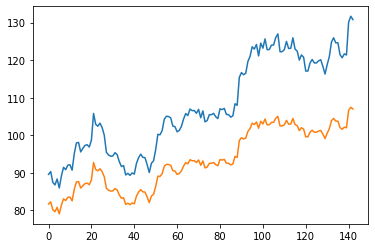

In [50]:

plt.plot(real_stock_price)
plt.plot(predicted_stock_price)